## Load Packages
This section loads necessary Python libraries such as Pandas for data manipulation, Matplotlib for plotting, and Seaborn for enhanced visualizations. These tools are essential for the analysis as they provide the functions needed to manipulate large datasets and visualize the results effectively.

In [21]:
# Load necessary packages for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)

## Get Data from all the ATP + Grand Slam Tennis Matches in the Last 30 Years
This section involves loading the data which consists of records from ATP and Grand Slam tennis matches. We will perform initial data loading, view the dataset structure, and prepare the data by cleaning and necessary transformations.

In [2]:
# Load the dataset
dataframes=[]

for x in range(1993,2024):
    x=pd.read_csv(f'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{x}.csv')
    dataframes.append(x)
df=pd.concat(dataframes,ignore_index=True)

# Preview the first few rows of the dataset to ensure correct loading
df.head()



,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1993-339,Adelaide,Hard,32,A,19930104,1,101990,1.0,NaN,Richard Krajicek,R,196.0,NED,21.0,102358,NaN,NaN,Thomas Enqvist,R,190.0,SWE,18.8,6-1 6-4,3,R32,67.0,14.0,1.0,47.0,34.0,28.0,6.0,9.0,1.0,2.0,2.0,5.0,56.0,32.0,17.0,10.0,8.0,4.0,8.0,10.0,NaN,63.0,NaN
1,1993-339,Adelaide,Hard,32,A,19930104,2,101711,NaN,NaN,Alex Obrien,R,185.0,USA,22.8,100714,NaN,Q,Broderick Dyke,L,183.0,AUS,32.0,7-6(4) 7-6(5),3,R32,124.0,5.0,3.0,86.0,55.0,35.0,17.0,12.0,3.0,6.0,4.0,1.0,94.0,59.0,39.0,17.0,12.0,9.0,12.0,127.0,NaN,545.0,NaN
2,1993-339,Adelaide,Hard,32,A,19930104,3,101890,NaN,NaN,Jonathan Stark,R,188.0,USA,21.7,101889,NaN,NaN,Todd Woodbridge,R,178.0,AUS,21.7,6-2 6-2,3,R32,60.0,3.0,1.0,41.0,26.0,23.0,10.0,8.0,2.0,2.0,1.0,4.0,48.0,26.0,15.0,9.0,8.0,1.0,5.0,85.0,NaN,54.0,NaN
3,1993-339,Adelaide,Hard,32,A,19930104,4,102146,NaN,Q,Jordi Burillo,R,188.0,ESP,20.0,101609,7.0,NaN,David Wheaton,R,193.0,USA,23.5,6-1 6-3,3,R32,55.0,7.0,0.0,38.0,24.0,19.0,14.0,8.0,1.0,1.0,1.0,3.0,42.0,19.0,12.0,9.0,8.0,1.0,5.0,157.0,NaN,44.0,NaN
4,1993-339,Adelaide,Hard,32,A,19930104,5,101334,3.0,NaN,Alexander Volkov,L,188.0,RUS,25.8,101298,NaN,NaN,Jonas Svensson,R,188.0,SWE,26.2,7-6(4) 6-3,3,R32,82.0,6.0,2.0,65.0,28.0,23.0,27.0,11.0,1.0,1.0,2.0,0.0,63.0,43.0,31.0,9.0,10.0,4.0,5.0,17.0,NaN,81.0,NaN


In [3]:
df['tourney_date']=pd.to_datetime(df['tourney_date'],format='%Y%m%d')
df['year'] = df['tourney_date'].dt.year


##### Let's explore how the match durations have changed over the last 30 years in best of 3 matches


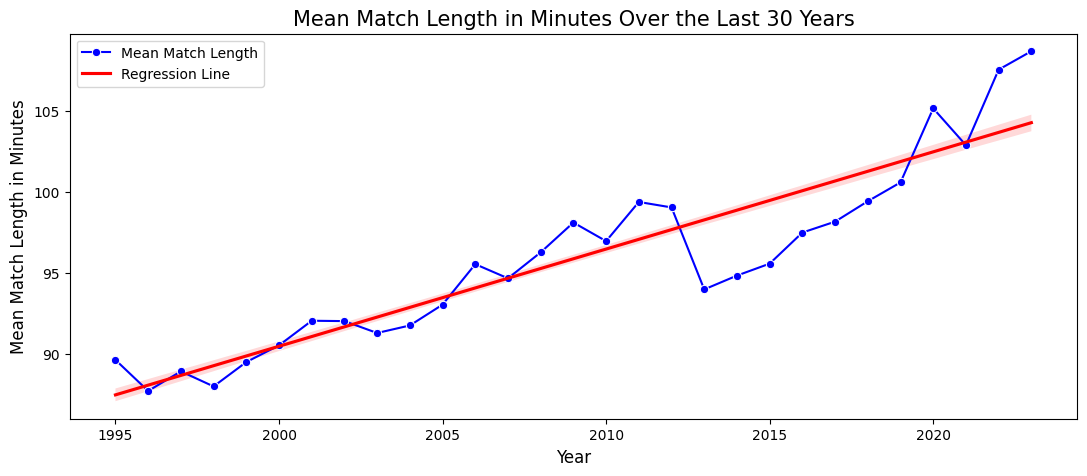

The rate of increase per year is 36.01 seconds/year.


In [4]:
# Filter the DataFrame for 'best_of' 3 matches since 1994 and drop rows with NaN in 'minutes' or 'year'
df_filtered = df[(df['best_of'] == 3) & (df['year'] > 1994)].dropna(subset=['minutes', 'year'])

# Calculate the mean match lengths per year
mean_lengths = df_filtered.groupby('year')['minutes'].mean().reset_index()

# Plotting setup
plt.figure(figsize=(13, 5))

# Plot the mean match lengths
sns.lineplot(data=mean_lengths, x='year', y='minutes', marker='o', color='blue', label='Mean Match Length')

# Add regression line
sns.regplot(data=df_filtered, x='year', y='minutes', scatter=False, label='Regression Line', color='red')

# Adding titles and labels
plt.title('Mean Match Length in Minutes Over the Last 30 Years',fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Match Length in Minutes', fontsize=12)
plt.legend()

# Display the plot
plt.show()

# Calculate the slope of the regression line
slope, intercept = np.polyfit(df_filtered['year'], df_filtered['minutes'], 1)
rate_of_increase = round(slope * 60, 2)  # convert the slope from minutes per year to seconds per year

print(f"The rate of increase per year is {rate_of_increase} seconds/year.")


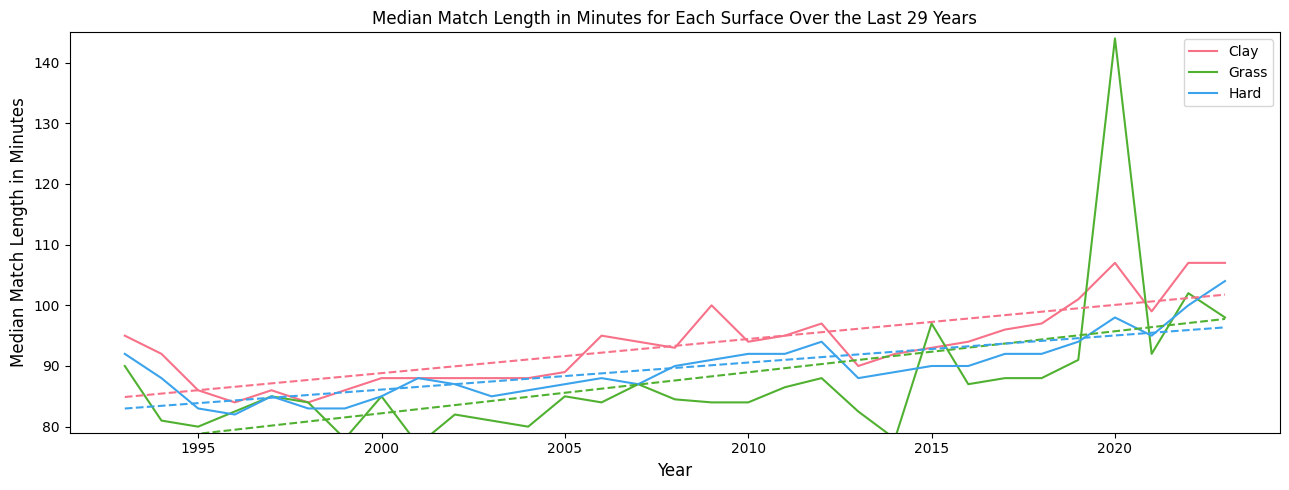

In [5]:
df_filtered = df[(df['surface'] != 'Carpet') & (df['best_of'] == 3)].dropna(subset=['minutes', 'year'])
   
median_lengths_surface = df_filtered.groupby(['year', 'surface'])['minutes'].median().reset_index()

fig, ax = plt.subplots(figsize=(13, 5))
palette = sns.color_palette("husl", n_colors=len(median_lengths_surface['surface'].unique()))
lineplot = sns.lineplot(data=median_lengths_surface, x='year', y='minutes', hue='surface', ax=ax, palette=palette)

handles, labels = ax.get_legend_handles_labels()

surfaces = median_lengths_surface['surface'].unique()
for i, surface in enumerate(surfaces):
    surface_data = median_lengths_surface[median_lengths_surface['surface'] == surface]
    coeffs = np.polyfit(surface_data['year'], surface_data['minutes'], 1)
    reg_y = np.polyval(coeffs, surface_data['year'])
    ax.plot(surface_data['year'], reg_y, color=palette[i], linestyle='--')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Match Length in Minutes', fontsize=12)
plt.ylim(79, 145)
plt.title('Median Match Length in Minutes for Each Surface Over the Last 29 Years')
ax.legend(handles=handles)
plt.tight_layout()
plt.show()


The duration of grass court matches in 2020 was notably longer than usual, likely influenced by the COVID-19 pandemic, which significantly reduced the number of matches played on grass courts. Apart from this anomaly, there has been a general trend of increasing match lengths across all three surfaces over recent years.

Now Let's see how the average height has changed from the players over the last 30 years and if that had a reason on how many aces got served.

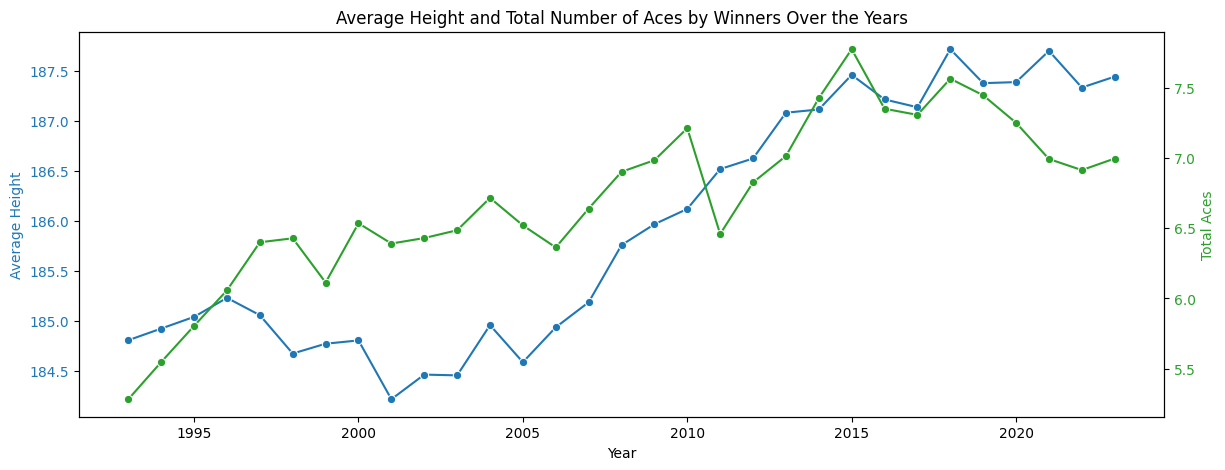

In [6]:
# Load necessary packages for data manipulation and visualization
import matplotlib.pyplot as plt
import seaborn as sns

winners_df = df[df['winner_ht'].notna()]
winners_stats = winners_df.groupby('year').agg({'winner_ht': 'mean', 'w_ace': 'mean'}).reset_index()


# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(14, 5))

color = 'tab:blue'
# Plotting the average height of winners on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Height', color=color)
sns.lineplot(data=winners_stats, x='year', y='winner_ht', marker='o', color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for the total number of aces, sharing the same x-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Total Aces', color=color)  # we already handled the x-label with ax1
sns.lineplot(data=winners_stats, x='year', y='w_ace', marker='o', color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# Optional: Add a title
plt.title('Average Height and Total Number of Aces by Winners Over the Years')

plt.show()


In [7]:
winners_stats

,year,winner_ht,w_ace
0,1993,184.808076,5.282921
1,1994,184.924734,5.547784
2,1995,185.041879,5.804864
3,1996,185.232000,6.058022
4,1997,185.058603,6.399810
5,1998,184.674571,6.428173
6,1999,184.773008,6.113304
7,2000,184.805979,6.535264
8,2001,184.217431,6.390778
9,2002,184.463745,6.429880


#### Findings: 
From 2005 to 2020, the ATP tour has observed notable trends in the physical profiles and performances of match winners. Initially, there was a noticeable increase in the average height of players, rising by about 3 centimeters until 2015, suggesting a trend toward taller athletes who could potentially dominate with powerful serves and extended reach.

However, after 2015, this trend in increasing height stabilized, and the rise in the number of aces served also peaked and subsequently declined. This shift indicates a potential balance being reached, where the advantages of height are countered by other strategic elements in the game.

A key factor in these changes appears to be the adaptation of playing surfaces across major tournaments, which have become noticeably slower, diminishing the sheer advantage of power serves. This evolution in court surfaces promotes a more rounded style of play, requiring players to excel not just in serving but in endurance, return accuracy, and tactical depth.

To understand these evolving dynamics, we've visualized these trends using a dual-axis time series plot, highlighting both the physical evolution and the tactical adaptations in professional tennis over the years. 


<br>
<br>
Let's go back to see if average height of players actually has a influence on gametime

Correlation between average height and match duration: 0.04


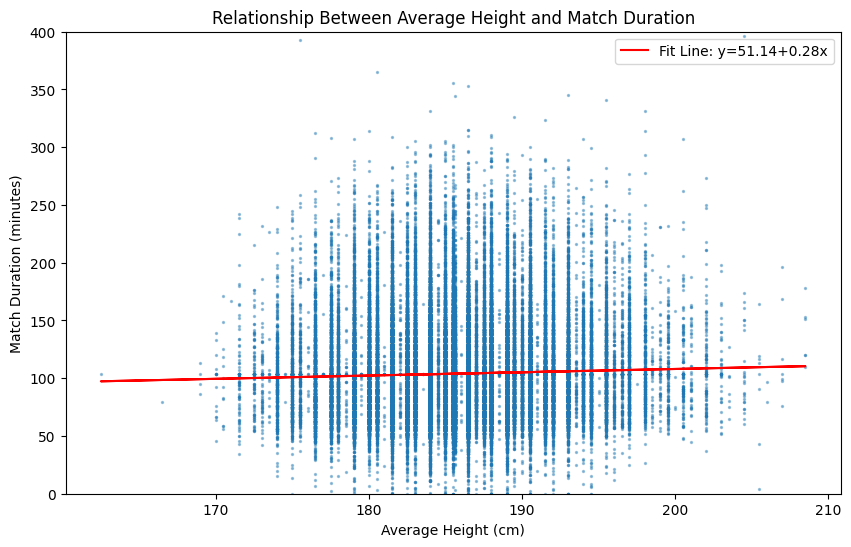

Slope: 0.284
Intercept: 51.14
R-value: 0.036
P-value: 6.027e-29
Standard Error: 0.025


In [22]:
# Calculate the average height for each match
df['avg_height'] = (df['winner_ht'] + df['loser_ht']) / 2

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['avg_height', 'minutes']] = imputer.fit_transform(df[['avg_height', 'minutes']])

# Calculate the correlation between average height and match duration
correlation = df['avg_height'].corr(df['minutes'])
print(f"Correlation between average height and match duration: {correlation:.2f}")


slope, intercept, r_value, p_value, std_err = linregress(df['avg_height'], df['minutes'])

plt.figure(figsize=(10, 6))
plt.scatter(df['avg_height'], df['minutes'], alpha=0.4,s=2)
plt.plot(df['avg_height'], intercept + slope*df['avg_height'], 'r', label=f'Fit Line: y={intercept:.2f}+{slope:.2f}x')
plt.ylim(0, 400)
plt.title('Relationship Between Average Height and Match Duration')
plt.xlabel('Average Height (cm)')
plt.ylabel('Match Duration (minutes)')
plt.legend()
plt.show()

# Print the results of the regression
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-value: {r_value:.3f}")
print(f"P-value: {p_value:.3e}")
print(f"Standard Error: {std_err:.3f}")


#### Findings: 
From the analysis, we see that there's only a very weak correlation between a player's average height and the duration of their matches. This suggests that while there's a statistically detectable trend—taller players do tend to be involved in slightly longer matches—the practical significance of this effect is quite minimal. It seems that height may play some role, possibly influencing factors like the effectiveness of serves. However, it's clear that other aspects such as a player's style, fitness level, and strategic choices during the match have a far greater impact on how long the games last.

Conclusion:
Based on the findings, it's apparent that height by itself isn't a reliable predictor of match duration in tennis. This highlights the complexity of the game, where numerous variables interact to influence the outcome and length of a match far more than any single physical attribute.